## Preprocess data from data/twitter_poll.csv

In [95]:
import pandas as pd
import numpy as np

In [96]:
twitter_poll_df = pd.read_csv('data/obama_aggregate.csv')
twitter_poll_df.drop(['date', 'Unnamed: 0'], axis=1, inplace=True)
twitter_poll_df.head()

,replies,retweets,favorites,approving
0,6175,13945,76360,57
1,5601,3954,24773,53
2,6368,4581,29044,53
3,3928,9502,46260,53
4,1288,6150,25260,53


## Get training and test set

In [97]:
from sklearn.model_selection import train_test_split

approve_estimate = twitter_poll_df['approving']
twitter_poll_df.drop('approving', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(twitter_poll_df, approve_estimate.values, test_size=0.2)

## Normalization
So at this point, favorites and retweets are the features, $X_{rpc}$, $X_{rtc}$, and $X_{fvc}$ that predict the approval estimate, $Y$. I want to normalize $X_{rpc}$, $X_{rtc}$, and $X_{fvc}$ since retweets are almost always less than favorites.

In [99]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)
print(y_train)

[[ 0.60006162  0.22926771  0.68089004]
 [-0.49992306 -0.16002678 -0.21951291]
 [ 0.10496088 -0.11336373 -0.14466297]
 ...
 [-0.40305553  0.24978336  0.0447757 ]
 [-0.44180254 -0.14192474 -0.10705436]
 [-0.5967906  -0.13166691 -0.1716207 ]]
[[-0.41166597 -0.16083131 -0.22487508]
 [-0.35139284 -0.16012735 -0.21826419]
 [ 0.73998139 -0.07977439 -0.02882552]
 ...
 [ 0.20398103  0.02682653  0.29716471]
 [ 1.85072913  3.09994999  1.57247847]
 [ 0.64311385 -0.02144558  0.25485503]]
[50 46 46 ... 49 48 48]


## Now that all the data preprocessing is done, I will do some visualization!

Let's analyze the three different features by graphing the training data

## Feature 1, $X_{rpc}$

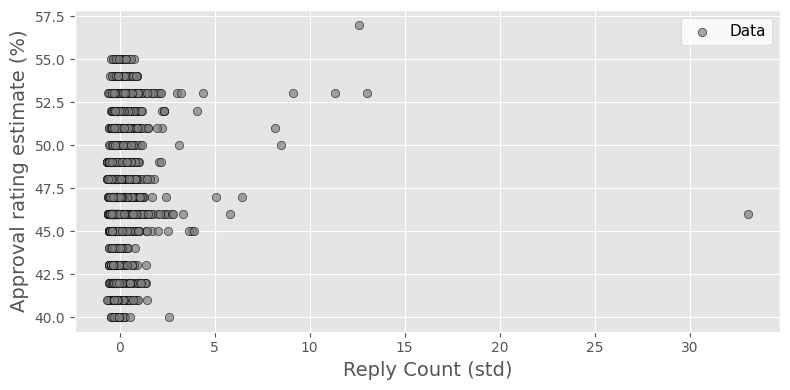

In [100]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
response = reg.predict(X_train)

ax.scatter(X_train[:,0], y_train, edgecolor='k', facecolor='grey', alpha=0.7, label='Data')
ax.set_ylabel('Approval rating estimate (%)', fontsize=14)
ax.set_xlabel('Reply Count (std)', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

## Feature 2, $X_{rtc}$

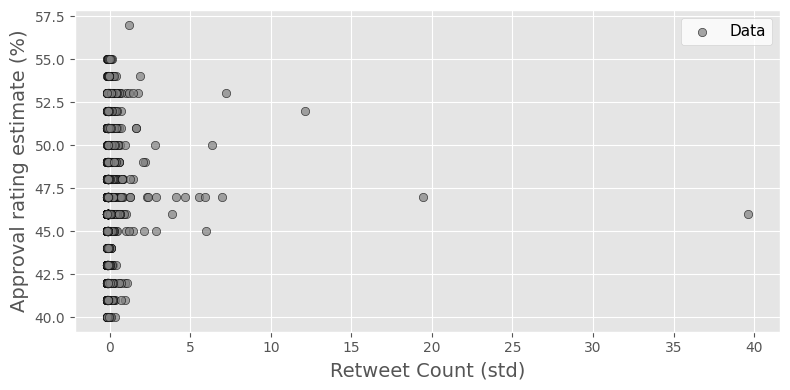

In [101]:
fig, ax = plt.subplots(figsize=(8, 4))
response = reg.predict(X_train)

ax.scatter(X_train[:,1], y_train, edgecolor='k', facecolor='grey', alpha=0.7, label='Data')
ax.set_ylabel('Approval rating estimate (%)', fontsize=14)
ax.set_xlabel('Retweet Count (std)', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

## Feature 3, $X_{fvc}$

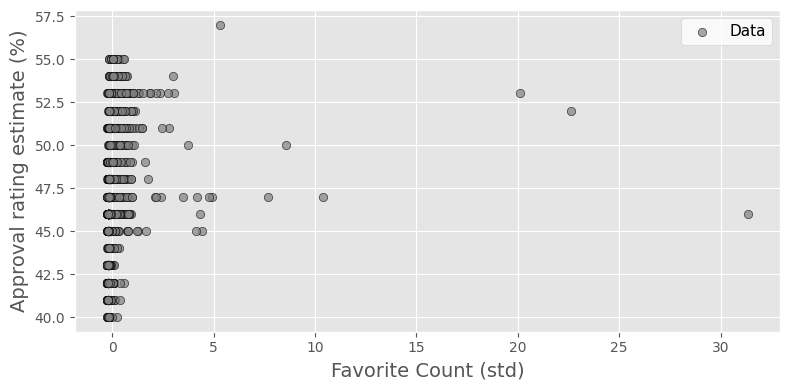

In [102]:
fig, ax = plt.subplots(figsize=(8, 4))
response = reg.predict(X_train)

ax.scatter(X_train[:,2], y_train, edgecolor='k', facecolor='grey', alpha=0.7, label='Data')
ax.set_ylabel('Approval rating estimate (%)', fontsize=14)
ax.set_xlabel('Favorite Count (std)', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

### Some naked eye observations:
* All features seem to have a typical range with some outliers.
* No one feature seems more indicative of approval rating than the others

## Model selection hunt!
Note: Both regression and classification models will work due to the discrete but numeric nature of the dataset

# Linear Models

### Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

### Linear regression metrics

Some observations:
* Coefficient of determination is negative, which originally confused me but after looking at the sklearn.metrics.r2_score documentation I see "it need not actually be the square of a quantity R", but this is indicative of a poor model

In [92]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Accuracy: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [-0.68526608 -5.49614354  6.2724307 ]
Mean squared error: 30.76
Coefficient of determination: -1.63
Accuracy: -1.63


### Logistic regression metrics

By default LogisticRegression uses an optimization algorithm that aproximates the Broyden-Fletcher-Goldfarb-Shanno algorithm. 
<br/><br/> Note: Logistic regression is actually a classification method, but since my data is discrete integers, it will still work as a multinominal classification model. 

Observations:
* Highly reduce mean squared error, and coefficient of determination is at least positive now.
* Still does not seem like a very good model

In [93]:
from sklearn.linear_model import LogisticRegression

log_regr = LogisticRegression()
log_regr.fit(X_train, y_train)
y_pred = log_regr.predict(X_test)

In [94]:
print('Coefficients: \n', log_regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Accuracy: %.2f' % log_regr.score(X_test, y_test))

Coefficients: 
 [[ 0.89131549  0.30808466 -1.70961423]
 [ 0.87446586  0.81185333 -4.3311042 ]
 [ 0.09964763  3.62198158 -4.38638201]
 [-0.2107535  -0.28783034 -5.3619912 ]
 [ 0.53136331 -0.54626223 -0.91111465]
 [-0.02338081  1.94712636 -0.5964082 ]
 [ 0.13383956  2.98911962 -1.67507885]
 [-0.35027381  2.0585218  -0.16317745]
 [-0.85897539 -0.12036761  1.9441759 ]
 [-1.03399734  2.26493703 -0.3335864 ]
 [-0.16423986 -0.92047891  2.54309406]
 [-0.12417936 -3.22039731  3.41128159]
 [-0.02646281 -3.06986237  3.37689517]
 [ 0.31485306 -3.85023616  3.81514582]
 [-0.27903265 -1.51089709  2.93006934]
 [ 0.22581062 -0.47529238  1.44779529]]
Mean squared error: 9.94
Coefficient of determination: 0.15
Accuracy: 0.23


### Generalized Linear Regression
From scikit-learn: GLM extends linear models in two ways. First, the predicted values $\hat{y}$ are linked to a linear combination of the input variables X via an inverse link function h as $$\hat{y}(w, X) = h(Xw).$$ Secondly, the squared loss function is replaced by the unit deviance d of a distribution in the exponential family (or more precisely, a reproductive exponential dispersion model).<br/> The minimization model becomes: $$\min_{w}\frac{1}{2n_{samples}}\sum_{i}d(y_{i}, \hat{y_{i}}) + \frac{\alpha}{2}||w||_{2}$$

Since the target values are positive valued and skewed, I will try GLM with Gamma deviance. Since $X$ is standardized and the Gamma distribution does not support negative values, I will set link='log' so that the inverse link function will guarantee non-negativeness.

In [104]:
from sklearn.linear_model import TweedieRegressor
regr = TweedieRegressor(alpha=0.5, power=2, link='log')
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

TweedieRegressor(alpha=0.5, link='log', power=2)

In [108]:
print("D^2 score: %.2f" % regr.score(X_test, y_test))

D^2 score: 0.02


D^2 score is the percentage of deviance explained, defined to be $$D^2 = 1 - \frac{D(y_{true},y_{pred})}{D_{null}}$$ So this prior result says about 2% of the deviance from the model's prediction to the true value is explained by random error. Not looking very good for the features :( <br/><br/>
Alpha is a constant that multiplies the penalty term ($\frac{1}{2}||w||_{2}$, or L2 norm) and I chose alpha arbitrarily, so I will try an incremental approach to choosing this hyperparameter

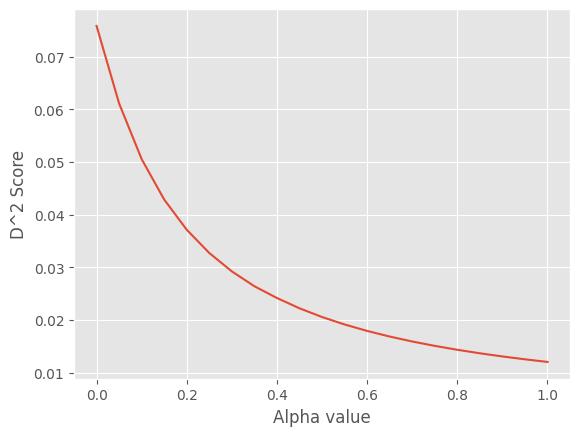

Max value of D^2 is 0.08 achieved at alpha 0.00


In [134]:
max_score = -1000
max_alpha = -1000
cur_alpha = 0

score_list = []
alpha_list = np.linspace(0,1,21)

while cur_alpha < 1.05:
    regr = TweedieRegressor(alpha=cur_alpha, power=2, link='log')
    regr.fit(X_train, y_train)
    cur_score = regr.score(X_test, y_test)
    if(cur_score > max_score):
        max_score = cur_score
        max_alpha = cur_alpha

    score_list.append(cur_score)
    cur_alpha += 0.05

f = plt.figure()
plt.plot(alpha_list, score_list)
plt.xlabel("Alpha value")
plt.ylabel("D^2 Score")
plt.show()
print("Max value of D^2 is %.2f achieved at alpha %.2f" % (max_score,max_alpha))

We can see that $D^2$ is a convex function with respect to $\alpha$, it is intuitive that this is a monotonically decreasing function, considering that the L2 penalization is designed to penalize model complexity.
<br/><br/>
Still though, with an $\alpha$ of 0, we can see that even without penalizing complexity we can only achieve a $D^2$ score of 8%. Time to look at other models!

## Linear models: perliminary conclusion
So I have went ahead and played around with a few other linear models such as BayesianRegression and StochasticGradientDescent, but all scoring metrics have remained under 10%, which leads me to believe that a linear model is not a good choice for this problem. So I will move forward!

In [142]:
from sklearn.linear_model import BayesianRidge

regr = BayesianRidge()
regr.fit(X_train, y_train)
print("Coefficient of determination: %.2f" % regr.score(X_test, y_test))

Coefficient of determination: 0.07


So linear models aren't looking too good !